In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [6]:
VARIABLES = [ # this array is set up to take variable name, mean, and sigma
	['BASS_P',0.003,0.001],
	['BASS_Q',0.5,0.1],
	['GROWTH',0.007,0.001],
	['MILES',3130509,100000],
	['REG_RATIO',0.01054142011,0.001],
	['AV_FRACTION',0.1,0.02]
]

In [7]:

def bass_model(p, q, t):
	"""
	This is the generic Bass model that takes p, q, and computes
	the end result at time t periods from now
	"""
	a = q/p
	b = p+q
	x = math.exp(-1 * b * t)
	y = 1 + a * x
	bass = (b ** 2 * x) / (p * y ** 2)
	return bass

def get_fatalities(input_vars):
	"""
	This model gets the number of fatalities
	"""
	p_var = input_vars[0]
	q_var = input_vars[1]
	growth_var = input_vars[2]
	miles_var = [input_vars[3]]
	ratio_var = input_vars[4]
	fraction_var = input_vars[5]
	new = [0]
	avmiles = [0]
	regmiles = [(miles_var[0] - avmiles[0])]
	i = 0
	while i < 30:
		miles_var.append(miles_var[i]*(1 + growth_var))
		i = i + 1
		new.append(bass_model(p_var, q_var, i))
		cumulative = np.sum(new)
		avmiles.append(cumulative * miles_var[i])
		regmiles.append(miles_var[i] - avmiles[i])
	totaldeaths = np.sum(regmiles)*ratio_var + np.sum(avmiles)*ratio_var*fraction_var
	return int(totaldeaths)


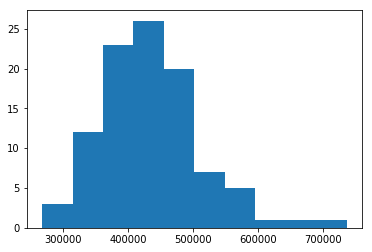

In [8]:
"""
The main script of the program.
"""
mean_vals = [VARIABLES[0][1], VARIABLES[1][1],
    VARIABLES[2][1], VARIABLES[3][1], VARIABLES[4][1],
    VARIABLES[5][1]]
sigma_vals = [VARIABLES[0][2], VARIABLES[1][2],
    VARIABLES[2][2], VARIABLES[3][2], VARIABLES[4][2],
    VARIABLES[5][2]]
results = []
i = 0
while i < 100:
    random_vals = []
    j = 0
    while j<=5:
        random_vals.append(np.random.normal(mean_vals[j],sigma_vals[j],1))
        j = j+1
    results.append(get_fatalities(random_vals))
    i = i+1
mean_result = np.mean(results)
stdev_result = np.std(results)
filtered_results = []
for each in results:
    if each > mean_result - (4 * stdev_result) and each < mean_result + (4 * stdev_result):
        filtered_results.append(each)
plt.hist(filtered_results)
plt.show()

